In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
stocks_df = yf.download(['TSLA','META','TQQQ','GME','NVDA'], start="2020-01-01", end="2023-01-01")
df = stocks_df.loc[:,'Close'].copy()
df.head()

[*********************100%***********************]  5 of 5 completed


,GME,META,NVDA,TQQQ,TSLA
Date,,,,,
2020-01-02,1.5775,209.779999,59.977501,22.709999,28.684000
2020-01-03,1.4700,208.669998,59.017502,22.092501,29.534000
2020-01-06,1.4625,212.600006,59.264999,22.512501,30.102667
2020-01-07,1.3800,213.059998,59.982498,22.485001,31.270666
2020-01-08,1.4300,215.220001,60.095001,23.002501,32.809334


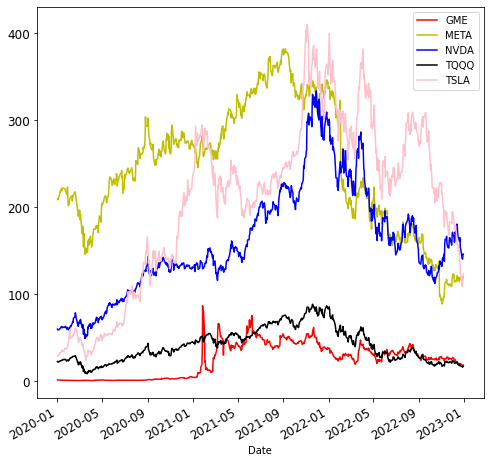

In [6]:
df.plot(figsize =(8,8), fontsize = 12, color=['r','y','b','black','pink'])
plt.style.use("seaborn-bright")
plt.show()

# using std and mean

In [7]:
dfpct = df.pct_change()


In [8]:
df1 = dfpct.dropna()
df1.head()

,GME,META,NVDA,TQQQ,TSLA
Date,,,,,
2020-01-03,-0.068146,-0.005291,-0.016006,-0.027191,0.029633
2020-01-06,-0.005102,0.018834,0.004194,0.019011,0.019255
2020-01-07,-0.056410,0.002164,0.012107,-0.001222,0.038801
2020-01-08,0.036232,0.010138,0.001876,0.023015,0.049205
2020-01-09,-0.029720,0.014311,0.010983,0.025215,-0.021945


In [17]:
#find std and mean

df2 = df1.describe().T.loc[:,['mean','std']]
df2

,mean,std
GME,0.008614,0.113233
META,-0.000248,0.030692
NVDA,0.001801,0.035261
TQQQ,0.001198,0.055218
TSLA,0.002965,0.045474


In [18]:
df2["mean"] = df2["mean"]*251
df2["std"] = df2["std"]*np.sqrt(251)
df2

,mean,std
GME,2.162048,1.793956
META,-0.062372,0.486259
NVDA,0.452115,0.558643
TQQQ,0.300636,0.874813
TSLA,0.744099,0.720448


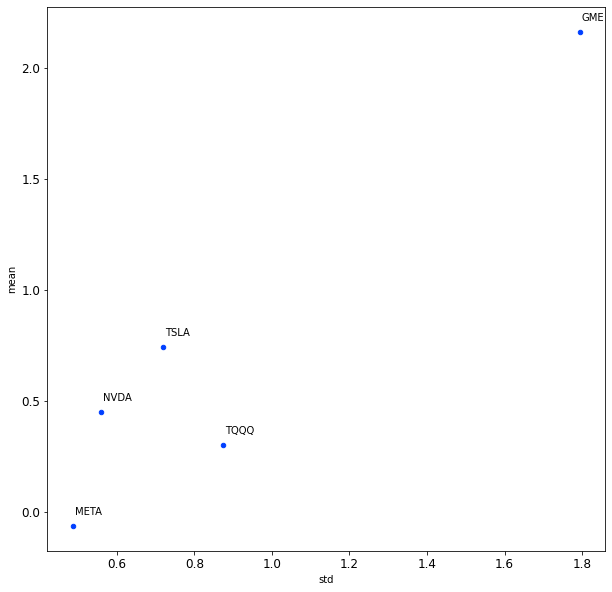

In [19]:
df2.plot.scatter(figsize = (10,10), fontsize=12, x="std",y="mean")
for index in df2.index:
    plt.annotate(index, xy=(df2.loc[index,"std"]+0.005, df2.loc[index,"mean"]+0.05))

In [20]:

print(df2['mean'].GME * df2['std'].GME)
print(df2['mean'].META * df2['std'].META)
print(df2['mean'].NVDA * df2['std'].NVDA)
print(df2['mean'].TQQQ * df2['std'].TQQQ)
print(df2['mean'].TSLA * df2['std'].TSLA)

3.8786181058987927
-0.03032874821785398
0.25257084684691994
0.2630003401454459
0.5360848693752646


# Volatility

In [9]:
df1

,GME,META,NVDA,TQQQ,TSLA
Date,,,,,
2020-01-03,-0.068146,-0.005291,-0.016006,-0.027191,0.029633
2020-01-06,-0.005102,0.018834,0.004194,0.019011,0.019255
2020-01-07,-0.056410,0.002164,0.012107,-0.001222,0.038801
2020-01-08,0.036232,0.010138,0.001876,0.023015,0.049205
2020-01-09,-0.029720,0.014311,0.010983,0.025215,-0.021945
...,...,...,...,...,...
2022-12-23,0.013630,0.007855,-0.008671,0.002851,-0.017551
2022-12-27,-0.093625,-0.009827,-0.071353,-0.042638,-0.114089
2022-12-28,-0.015385,-0.010780,-0.006019,-0.040380,0.033089


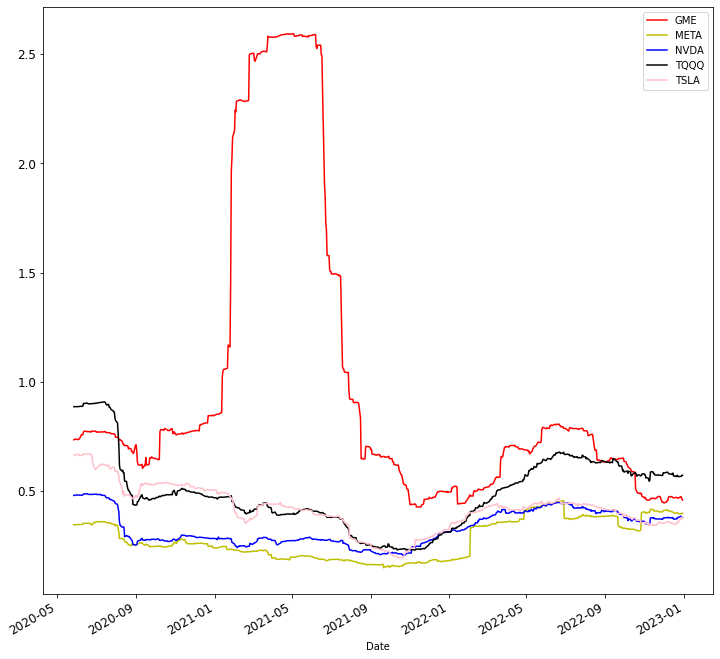

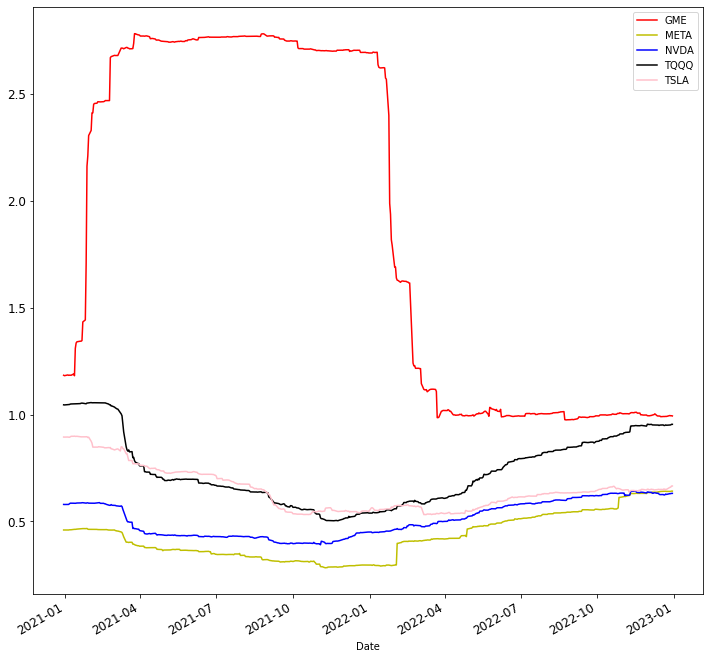

In [14]:
min_periods = 100
vol = df1[['GME','META','NVDA','TQQQ','TSLA']].rolling(min_periods).std() * np.sqrt(min_periods)

vol.plot(figsize=(12,12), fontsize=12, color = ['r','y','b','black','pink'])


min_periods1 = 251
vol1 = df1[['GME','META','NVDA','TQQQ','TSLA']].rolling(min_periods1).std() * np.sqrt(min_periods1)

vol1.plot(figsize=(12,12), fontsize=12, color = ['r','y','b','black','pink'])
plt.show()


In [23]:
import math

df1_times100 = df1*100
daily_meta = df1_times100['META'].std()
daily_tsla = df1_times100['TSLA'].std()
daily_tqqq = df1_times100['TQQQ'].std()
daily_gme = df1_times100['GME'].std()
daily_nvda = df1_times100['NVDA'].std()


annual_meta = math.sqrt(252) * daily_meta
print('Annual volatility:')
print ('META: ', '{:.2f}%'.format(annual_meta ))
annual_tsla = math.sqrt(252) * daily_tsla
print ('TSLA: ', '{:.2f}%'.format(annual_tsla ))
annual_tqqq = math.sqrt(252) * daily_tqqq
print ('TQQQ: ', '{:.2f}%'.format(annual_tqqq ))
annual_gme = math.sqrt(252) * daily_gme
print ('GME: ', '{:.2f}%'.format(annual_gme ))
annual_nvda = math.sqrt(252) * daily_nvda
print ('NVDA: ', '{:.2f}%'.format(annual_nvda ))

Annual volatility:
META:  48.72%
TSLA:  72.19%
TQQQ:  87.66%
GME:  179.75%
NVDA:  55.98%


In [24]:
df1

,GME,META,NVDA,TQQQ,TSLA
Date,,,,,
2020-01-03,-0.068146,-0.005291,-0.016006,-0.027191,0.029633
2020-01-06,-0.005102,0.018834,0.004194,0.019011,0.019255
2020-01-07,-0.056410,0.002164,0.012107,-0.001222,0.038801
2020-01-08,0.036232,0.010138,0.001876,0.023015,0.049205
2020-01-09,-0.029720,0.014311,0.010983,0.025215,-0.021945
...,...,...,...,...,...
2022-12-23,0.013630,0.007855,-0.008671,0.002851,-0.017551
2022-12-27,-0.093625,-0.009827,-0.071353,-0.042638,-0.114089
2022-12-28,-0.015385,-0.010780,-0.006019,-0.040380,0.033089


In [25]:
#sharpe

# Sharpe Ratio

In [26]:
profit = df1.rolling(252).mean()
risk = df1.rolling(252).std()
sharpe = profit / risk * (252 ** 0.5)

<AxesSubplot:>

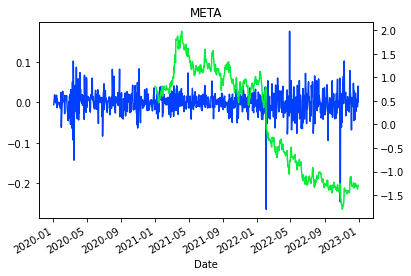

In [28]:
df1["META"].plot()
sharpe["META"].plot(title = "META",secondary_y=True)


<AxesSubplot:>

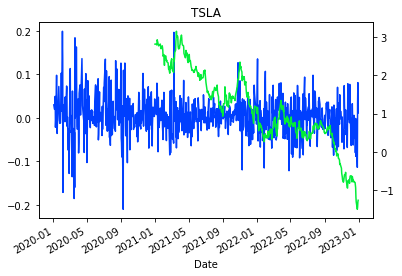

In [29]:
df1["TSLA"].plot()
sharpe["TSLA"].plot(title = "TSLA",secondary_y=True)

<AxesSubplot:>

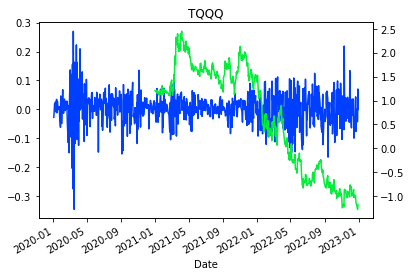

In [30]:
df1["TQQQ"].plot()
sharpe["TQQQ"].plot(title = "TQQQ",secondary_y=True)

<AxesSubplot:>

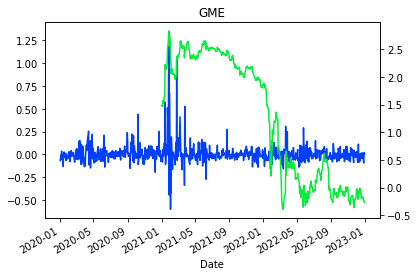

In [31]:
df1["GME"].plot()
sharpe["GME"].plot(title = "GME",secondary_y=True)

<AxesSubplot:>

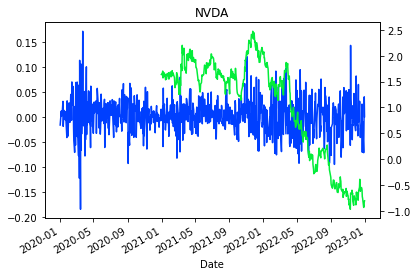

In [32]:
df1["NVDA"].plot()
sharpe["NVDA"].plot(title = "NVDA",secondary_y=True)

# Method to find the best portfolio

In [33]:
df1

,GME,META,NVDA,TQQQ,TSLA
Date,,,,,
2020-01-03,-0.068146,-0.005291,-0.016006,-0.027191,0.029633
2020-01-06,-0.005102,0.018834,0.004194,0.019011,0.019255
2020-01-07,-0.056410,0.002164,0.012107,-0.001222,0.038801
2020-01-08,0.036232,0.010138,0.001876,0.023015,0.049205
2020-01-09,-0.029720,0.014311,0.010983,0.025215,-0.021945
...,...,...,...,...,...
2022-12-23,0.013630,0.007855,-0.008671,0.002851,-0.017551
2022-12-27,-0.093625,-0.009827,-0.071353,-0.042638,-0.114089
2022-12-28,-0.015385,-0.010780,-0.006019,-0.040380,0.033089


In [34]:
S_return= df1.copy()

S_return

,GME,META,NVDA,TQQQ,TSLA
Date,,,,,
2020-01-03,-0.068146,-0.005291,-0.016006,-0.027191,0.029633
2020-01-06,-0.005102,0.018834,0.004194,0.019011,0.019255
2020-01-07,-0.056410,0.002164,0.012107,-0.001222,0.038801
2020-01-08,0.036232,0.010138,0.001876,0.023015,0.049205
2020-01-09,-0.029720,0.014311,0.010983,0.025215,-0.021945
...,...,...,...,...,...
2022-12-23,0.013630,0.007855,-0.008671,0.002851,-0.017551
2022-12-27,-0.093625,-0.009827,-0.071353,-0.042638,-0.114089
2022-12-28,-0.015385,-0.010780,-0.006019,-0.040380,0.033089


In [35]:
#equal weight
num=5

even_weights = np.repeat(1/num, num)

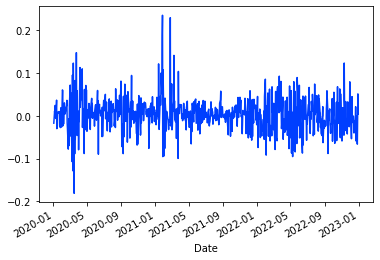

In [36]:
return_weight = S_return.mul(even_weights,axis=1)
S_return['Portfolio'] = return_weight.sum(axis=1)
S_return.Portfolio.plot()
plt.show()

In [37]:
S_return.head()

,GME,META,NVDA,TQQQ,TSLA,Portfolio
Date,,,,,,
2020-01-03,-0.068146,-0.005291,-0.016006,-0.027191,0.029633,-0.017400
2020-01-06,-0.005102,0.018834,0.004194,0.019011,0.019255,0.011238
2020-01-07,-0.056410,0.002164,0.012107,-0.001222,0.038801,-0.000912
2020-01-08,0.036232,0.010138,0.001876,0.023015,0.049205,0.024093
2020-01-09,-0.029720,0.014311,0.010983,0.025215,-0.021945,-0.000231


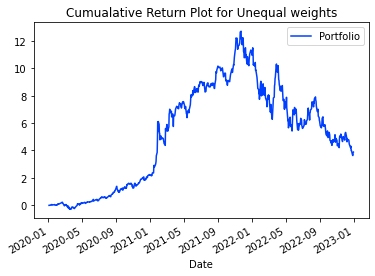

In [38]:
#create a cumulative return plot
def cumulative_return(name):
    for port in name:
        cumulative = ((1+S_return[port]).cumprod()-1)
        cumulative.plot(label=port, title="Cumualative Return Plot for Unequal weights")
    plt.legend()
    plt.show()
    
cumulative_return(['Portfolio'])
    
    

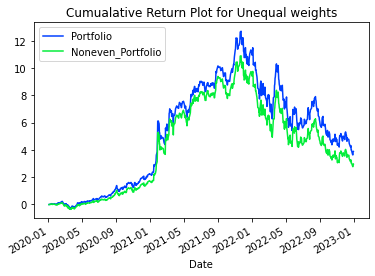

In [39]:
#non-equal weight portfoli

even_weights_ew = np.array([0.22,0.26,0.12,0.31,0.09])

S_return['Noneven_Portfolio'] = df1.mul(even_weights_ew, axis=1).sum(axis=1)
cumulative_return(['Portfolio','Noneven_Portfolio'])


In [40]:
S_return.head()

,GME,META,NVDA,TQQQ,TSLA,Portfolio,Noneven_Portfolio
Date,,,,,,,
2020-01-03,-0.068146,-0.005291,-0.016006,-0.027191,0.029633,-0.017400,-0.024051
2020-01-06,-0.005102,0.018834,0.004194,0.019011,0.019255,0.011238,0.011904
2020-01-07,-0.056410,0.002164,0.012107,-0.001222,0.038801,-0.000912,-0.007282
2020-01-08,0.036232,0.010138,0.001876,0.023015,0.049205,0.024093,0.022395
2020-01-09,-0.029720,0.014311,0.010983,0.025215,-0.021945,-0.000231,0.004342


# Find the optimal weights with the least risk

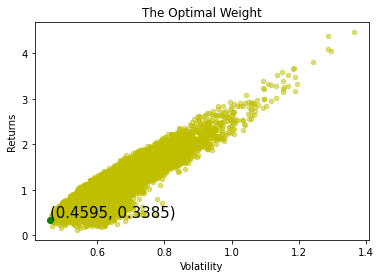

In [31]:
newreturn = df1.copy()
cov_m = newreturn.cov()
cov_annual = cov_m *252
Stock_list = ['GME','TQQQ','NVDA','META','TSLA']


testnumber = 10000
random_w = np.empty((testnumber, 7))
np.random.seed(7)

for i in range(testnumber):
    random_5 = np.random.random(5)
    random_weight = random_5/ (np.sum(random_5))
    
    day_return = newreturn.mul(random_weight, axis=1).sum(axis=1).mean()
    annual_return = (1+day_return)**252-1
    
    volatility_weight = np.sqrt(np.dot(random_weight.T,np.dot(cov_annual,random_weight)))
    
    random_w[i][:5]=random_weight #save the above data to random_w
    random_w[i][5]=annual_return
    random_w[i][6]=volatility_weight

randomport = pd.DataFrame(random_w)
randomport.columns=[stock +'_weight' for stock in Stock_list]+['Returns','Volatility']
randomport.plot('Volatility','Returns',kind='scatter',alpha=0.5, c='y', title="The Optimal Weight")

min_index = randomport.Volatility.idxmin()
x = randomport.loc[min_index,'Volatility']
y = randomport.loc[min_index,'Returns']
plt.scatter(x, y, color='g')
plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=15) #x=std,y=return
plt.show()

In [88]:
GMV_weights = np.array(randomport.iloc[min_index, 0:num])
df1['Portfolio_GMV'] = newreturn.mul(GMV_weights, axis=1).sum(axis=1)

print(GMV_weights)

[0.06429351 0.56079825 0.24339045 0.03875875 0.09275904]


C:\Users\manhokit\AppData\Local\Temp/ipykernel_24896/2710845094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Portfolio_GMV'] = newreturn.mul(GMV_weights, axis=1).sum(axis=1)


# Rebalancing the portfolio

[*********************100%***********************]  5 of 5 completed
Date
2020-01-31    1.000000
2020-02-29    1.000155
2020-03-31    0.882952
2020-04-30    1.111246
2020-05-31    1.225550
2020-06-30    1.299958
2020-07-31    1.466616
2020-08-31    1.871233
2020-09-30    1.790221
2020-10-31    1.742828
2020-11-30    1.986990
2020-12-31    2.033309
2021-01-31    4.116448
2021-02-28    3.925195
2021-03-31    4.433261
2021-04-30    4.857489
2021-05-31    5.010093
2021-06-30    5.521533
2021-07-31    5.499846
2021-08-31    6.086312
2021-09-30    5.530581
2021-10-31    5.994095
2021-11-30    6.463491
2021-12-31    6.296298
2022-01-31    5.560681
2022-02-28    4.515556
2022-03-31    5.003027
2022-04-30    4.095440
2022-05-31    3.959011
2022-06-30    3.318427
2022-07-31    3.627458
2022-08-31    3.442641
2022-09-30    2.876040
2022-10-31    2.443775
2022-11-30    2.929263
2022-12-31    2.677911
Freq: M, dtype: float64


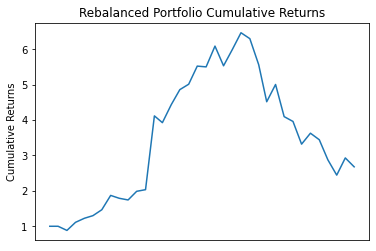

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

stock_symbols = ['META', 'GME', 'NVDA', 'TQQQ', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-01-01'
stock_data = yf.download(stock_symbols, start=start_date, end=end_date)
monthly_returns = stock_data['Adj Close'].resample('M').ffill().pct_change()
initial_weights = np.array([0.06429351,0.56079825,0.24339045,0.03875875,0.09275904])
monthly_portfolio_returns = (monthly_returns * initial_weights).sum(axis=1)
cumulative_portfolio_returns = (1 + monthly_portfolio_returns).cumprod()
print(cumulative_portfolio_returns)


ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.plot(cumulative_portfolio_returns)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Rebalanced Portfolio Cumulative Returns')
plt.show()